<a href="https://colab.research.google.com/github/DianaRoor/-/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.


Нужно решить задачу классификации физических лиц по уровню дохода.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.
Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

In [ ]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#пропуски отсутствуют
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

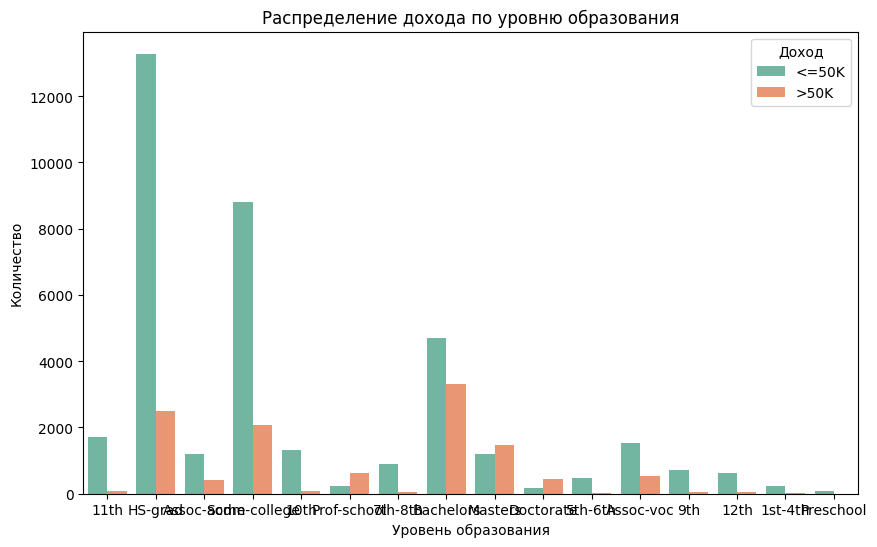

In [ ]:
#График распределения по уровню дохода
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', hue='income', palette='Set2')
plt.title('Распределение дохода по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(title='Доход')
plt.show()

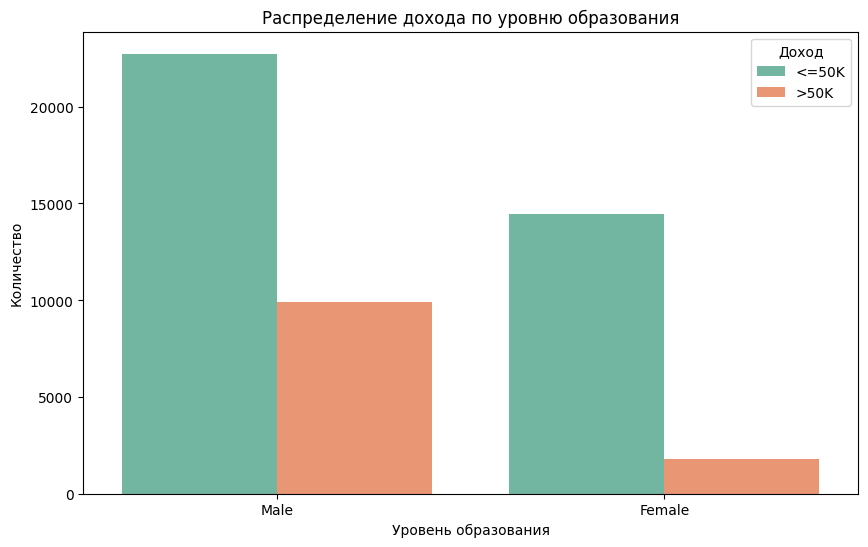

In [ ]:
#График распределения по уровню дохода
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='income', palette='Set2')
plt.title('Распределение дохода по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(title='Доход')
plt.show()

Преобразуйте категориальные признаки.

In [ ]:
category_columns = ['workclass','education','marital-status', 'occupation', 'relationship','race', 'gender', 'native-country', 'income']
df_1 = pd.get_dummies(data, columns=category_columns, drop_first=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 101 entries, age to income_>50K
dtypes: bool(95), int64(6)
memory usage: 6.7 MB


Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X = df_1.drop('income_>50K', axis=1)  #разделяем выборки на обучающую и тестовую
y = df_1['income_>50K']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите модели логистической регрессии

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:5]

array([False, False,  True, False,  True])

In [ ]:
model.predict(X_test)

array([False, False,  True, ...,  True, False,  True])

In [ ]:
model.predict_proba(X_test)

array([[0.98718598, 0.01281402],
       [0.90123537, 0.09876463],
       [0.06709611, 0.93290389],
       ...,
       [0.4236848 , 0.5763152 ],
       [0.9974575 , 0.0025425 ],
       [0.26794223, 0.73205777]])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model.score(X_train, y_train)


0.8573037158358071

In [ ]:
model.score(X_test,y_test)

0.8573037158358071

Обучите модели  опорных векторов на обучающем множестве.

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_train, y_train)


0.8619251145292145

In [ ]:
clf.score(X_test, y_test)

0.8558706111167981

Пропусков не было
Преобразование категориальных признаков
Сравнили точности модели
Тестовые модели лог. регрессии и опорном векторе максимально схожи. Обучающие модели имеют небольшую разницу
Возможные улучшения: можно примененить другие модели, увеличенить объем данных или методы отбора признаков.